In [4]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

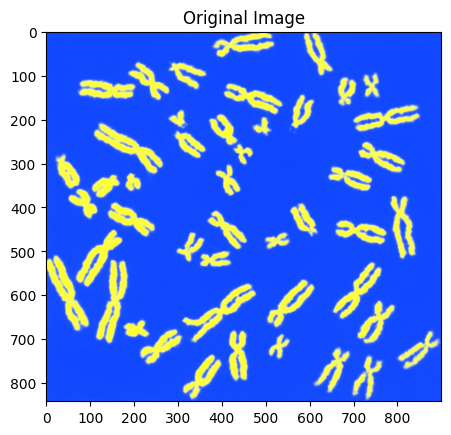

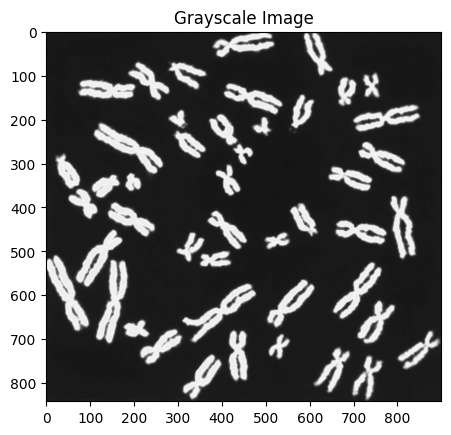

In [6]:


image_path = r"C:\Users\navde\Desktop\chromosomes.jpg"  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Plot the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the grayscale image
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.show()



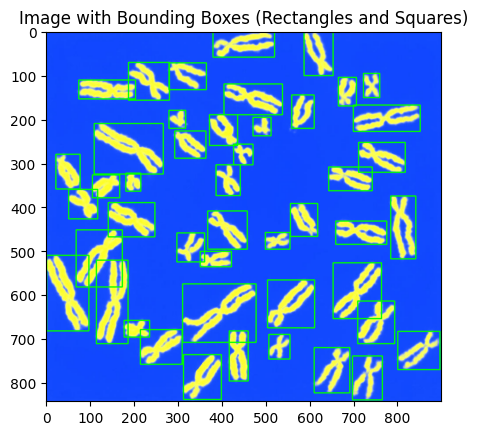

In [12]:

# Convert the grayscale image to binary using adaptive and global thresholding
adaptive_binary = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
_, global_binary = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_and(adaptive_binary, global_binary)

# Apply morphological operations (erosion followed by dilation)
kernel = np.ones((3, 3), np.uint8)
binary_image = cv2.erode(binary_image, kernel, iterations=1)
binary_image = cv2.dilate(binary_image, kernel, iterations=1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'gray_image' and 'image' are already defined

# Convert the grayscale image to binary using adaptive and global thresholding
adaptive_binary = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
_, global_binary = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
binary_image = cv2.bitwise_and(adaptive_binary, global_binary)

# Apply morphological operations (erosion followed by dilation)
kernel = np.ones((3, 3), np.uint8)
binary_image = cv2.erode(binary_image, kernel, iterations=1)
binary_image = cv2.dilate(binary_image, kernel, iterations=1)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store features and bounding boxes
data = []

# Create an image to draw bounding boxes
image_with_boxes = image.copy()

# Iterate through each contour and calculate features
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Calculate circularity
    circularity = (4 * np.pi * area) / (perimeter ** 2)

    # Bounding box
    x, y, w, h = cv2.boundingRect(contour)
    bounding_box_area = w * h

    # Calculate aspect ratio
    aspect_ratio = float(w) / h

    # Determine the shape based on aspect ratio
    if aspect_ratio > 1.2:
        shape_label = "Rectangle"
    elif aspect_ratio < 0.8:
        shape_label = "Rectangle"  # Invert width and height for landscape rectangles
    else:
        shape_label = "Square"

    # Append features to the list
    data.append({"Chromosome": f"Chromosome_{i + 1}", "Area": area, "Perimeter": perimeter,
                 "Bounding_Box_Area": bounding_box_area, "Circularity": circularity,
                 "X": x, "Y": y, "Width": w, "Height": h, "Shape": shape_label})

    # Draw bounding box on the image
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Image with Bounding Boxes (Rectangles and Squares)")
plt.show()








In [13]:
chromosomes_data=pd.DataFrame(data)
chromosomes_data

,Chromosome,Area,Perimeter,Bounding_Box_Area,Circularity,X,Y,Width,Height,Shape
0,Chromosome_1,2113.5,460.090400,6800,0.125466,696,739,68,100,Rectangle
1,Chromosome_2,2950.0,482.842707,8772,0.159009,312,736,86,102,Square
2,Chromosome_3,2435.5,499.144222,8343,0.122842,609,720,81,103,Rectangle
3,Chromosome_4,1004.5,240.551296,2688,0.218145,506,690,48,56,Square
4,Chromosome_5,2172.0,497.386863,8352,0.110327,799,683,96,87,Square
5,Chromosome_6,3101.0,497.847760,4902,0.157224,416,682,43,114,Rectangle
6,Chromosome_7,2712.0,455.244727,7505,0.164441,214,679,95,79,Rectangle
7,Chromosome_8,1319.0,196.651801,2204,0.428607,177,658,58,38,Rectangle
8,Chromosome_9,2795.5,495.972650,8148,0.142808,708,614,84,97,Square
9,Chromosome_10,4857.5,815.619398,22211,0.091759,310,575,167,133,Rectangle


In [17]:


# Select numeric columns for normalization
numeric_columns = chromosomes_data=pd.DataFrame(data)
numeric_columns=chromosomes_data.select_dtypes(include=np.number).columns

# Manual z-scoring (standardization)
for col in numeric_columns:
    mean = chromosomes_data[col].mean()
    std_dev = chromosomes_data[col].std()
    chromosomes_data[col] = (chromosomes_data[col] - mean) / std_dev


# Detect outliers based on z-scores
z_threshold = 3.2 # Adjust this threshold based on your requirements

# Calculate z-scores for each numeric column
z_scores = (chromosomes_data[numeric_columns] - chromosomes_data[numeric_columns].mean()) / chromosomes_data[numeric_columns].std()

# Identify rows with at least one z-score beyond the threshold
outliers = (np.abs(z_scores) > z_threshold).any(axis=1)

# Display the rows with outliers
print("\nRows with Outliers:")
print(chromosomes_data[outliers])




Rows with Outliers:
      Chromosome      Area  Perimeter  Bounding_Box_Area  Circularity  \
9  Chromosome_10  1.944532   2.244969           3.329976    -1.063462   

          X         Y    Width    Height      Shape  
9 -0.382124  0.936989  2.51535  1.494362  Rectangle  
